In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data.describe()

,pm10,pm25,pm1,windspeed,wind_dir
count,247945.000000,248153.000000,248169.000000,250834.000000,250834.000000
mean,16.052755,13.103255,11.313749,0.475628,112.787427
std,13.100700,10.752370,9.733583,0.538472,119.265448
min,0.300000,0.300000,0.300000,0.000000,0.000000
25%,7.200000,6.000000,4.900000,0.000000,0.000000
50%,12.500000,10.100000,8.600000,0.393000,74.000000
75%,20.600000,16.600000,14.400000,0.703000,209.000000
max,213.100000,145.600000,141.200000,6.673000,359.001000


In [14]:
data.pm10[(data.windspeed<2.5) & (data.wind_dir<45)].dropna()

2019-12-28 19:26:00    13.441
2019-12-28 19:31:00    16.158
2019-12-28 20:13:00    16.950
2019-12-28 20:24:00    11.508
2019-12-28 22:06:00    14.416
                        ...  
2020-07-09 03:32:53     9.400
2020-07-09 03:33:54    10.100
2020-07-09 03:34:53     9.300
2020-07-09 03:35:53     9.000
2020-07-09 03:36:53    13.600
Name: pm10, Length: 113229, dtype: float64

Text(0.5, 0, '$PM_{10}~(\\mu g/m^3)$')

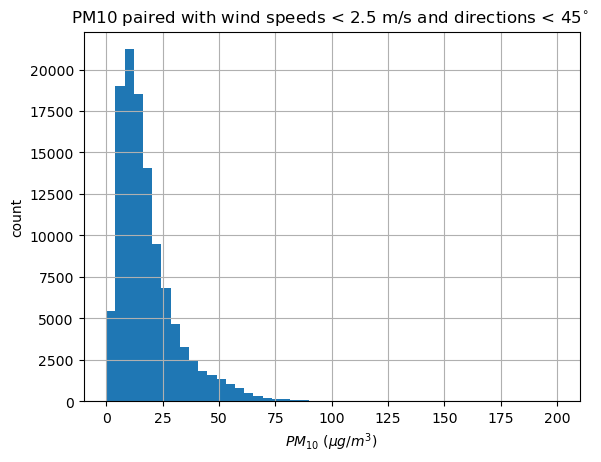

In [17]:
data.pm10[(data.windspeed<2.5) & (data.wind_dir<45)].dropna().hist(bins = np.linspace(0,200))
plt.title("PM10 paired with wind speeds < 2.5 m/s and directions < 45$^{\circ}$ ")
plt.ylabel('count')
plt.xlabel("$PM_{10}~(\mu g/m^3)$")

In [10]:
data

,pm10,pm25,pm1,windspeed,wind_dir
2019-12-28 06:50:00,13.716,9.791,7.925,0.683,157.040
2019-12-28 06:51:00,19.175,10.541,7.891,1.093,129.451
2019-12-28 06:52:00,15.716,10.000,6.958,0.584,309.717
2019-12-28 06:53:00,12.816,8.733,6.900,0.720,167.773
2019-12-28 06:54:00,9.675,7.325,6.100,1.181,160.181
...,...,...,...,...,...
2020-07-10 23:55:41,NaN,NaN,NaN,0.389,48.000
2020-07-10 23:56:41,NaN,NaN,NaN,0.525,42.000
2020-07-10 23:57:41,NaN,NaN,NaN,0.396,21.000
2020-07-10 23:58:41,NaN,NaN,NaN,0.433,356.001


In [16]:
data.pm10.dropna()

2019-12-28 06:50:00    13.716
2019-12-28 06:51:00    19.175
2019-12-28 06:52:00    15.716
2019-12-28 06:53:00    12.816
2019-12-28 06:54:00     9.675
                        ...  
2020-07-09 03:32:53     9.400
2020-07-09 03:33:54    10.100
2020-07-09 03:34:53     9.300
2020-07-09 03:35:53     9.000
2020-07-09 03:36:53    13.600
Name: pm10, Length: 247945, dtype: float64

In [18]:
data.pm10.dropna().describe()

count    247945.000000
mean         16.052755
std          13.100700
min           0.300000
25%           7.200000
50%          12.500000
75%          20.600000
max         213.100000
Name: pm10, dtype: float64

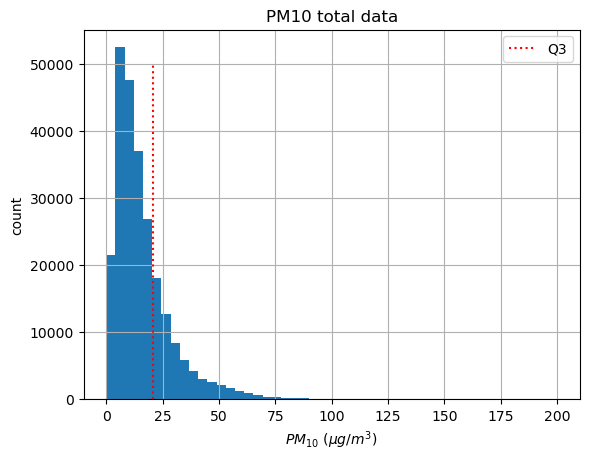

In [22]:
data.pm10.hist(bins = np.linspace(0,200))
plt.title("PM10 total data")
plt.ylabel('count')
plt.xlabel("$PM_{10}~(\mu g/m^3)$")
plt.vlines(20.6, 0, 50000, linestyle = 'dotted', label = 'Q3', color = 'red')
plt.legend()


In [4]:
path = r'/cxnfs/Mark/Data/cleaned_data/'
df = pd.read_csv(r'/cxnfs/Mark/Data/complete_data.csv', index_col = 0, parse_dates =  True)
#cleaned data
pm10 = pd.read_csv(path+'pm10_cleaned.csv', index_col = 0, parse_dates = True)
pm25 = pd.read_csv(path+'pm25_cleaned.csv', index_col = 0, parse_dates = True)
pm1 = pd.read_csv(path+'pm1_cleaned.csv', index_col = 0, parse_dates = True)
#storing PM data in a dataframe along with other variables
data = pd.DataFrame()
data.index = df.index
data['pm10'] = pm10.iloc[:,0]
data['pm25'] = pm25.iloc[:,0]
data['pm1'] = pm1.iloc[:,0]
data['windspeed'] = df[' Windspeed (m/s)']
data['wind_dir'] = df[' WindDirect (Degr)']
prepandemic_data = data['2020-02-01':'2020-03-09']
prepandemic_data = prepandemic_data.dropna(how = 'any', axis = 'rows')
# #classes were suspended last March 10, 2020 to March 14, 2020
ecq_data = data['2020-03-17':'2020-05-15'] #start of lockdown until end of ECQ
ecq_data = ecq_data.dropna(how = 'any', axis = 'rows')

In [3]:
ecq_data.index[-1] - ecq_data.index[0]

Timedelta('59 days 15:58:42')

In [198]:
prepandemic_data['2020-02-01':'2020-02-01'].pm10.to_numpy().shape

(1439,)

In [199]:
prepandemic_data['2020-02-02':'2020-02-02'].pm10.to_numpy().shape

(1439,)

In [205]:
prepandemic_data['2020-02-03':'2020-02-03'].pm10.to_numpy().shape

(1440,)

# Example of normalization plot

In [217]:
example = prepandemic_data['2020-02-01':'2020-02-01'].pm10

Text(0.5, 1.0, '1 Feb 2020 $PM_{10}$ measurements')

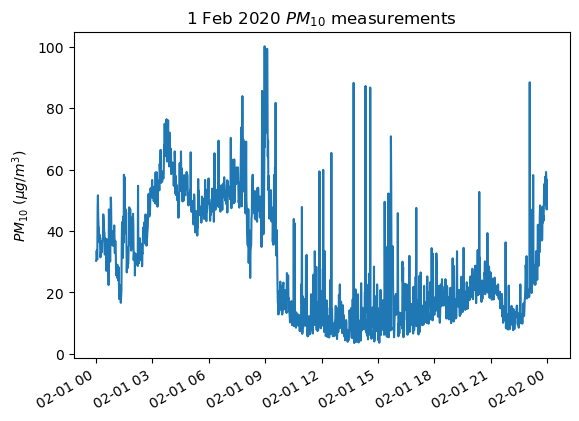

In [219]:
example.plot()
# plt.xticks([])
plt.ylabel("$PM_{10}~(\mu g/m^3)$")
plt.title("1 Feb 2020 $PM_{10}$ measurements")

In [222]:
example.max()

100.1

In [224]:
normalized_example = example.apply(lambda x: (x - example.min())/ (example.max() - example.min()))

Text(0.5, 1.0, '1 Feb 2020 normalized $PM_{10}$ measurements')

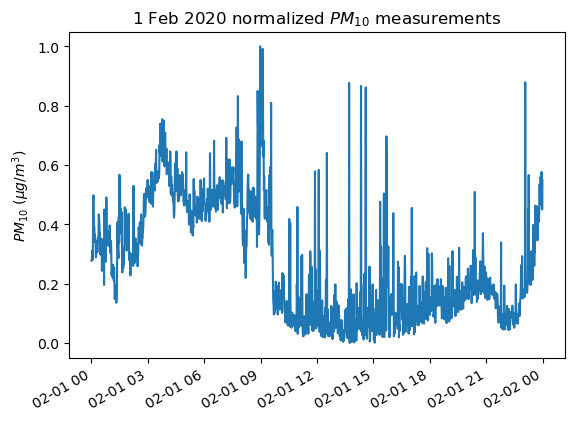

In [226]:
normalized_example.plot()
# plt.xticks([])
plt.ylabel("$PM_{10}~(\mu g/m^3)$")
plt.title("1 Feb 2020 normalized $PM_{10}$ measurements")

# histograms hourly

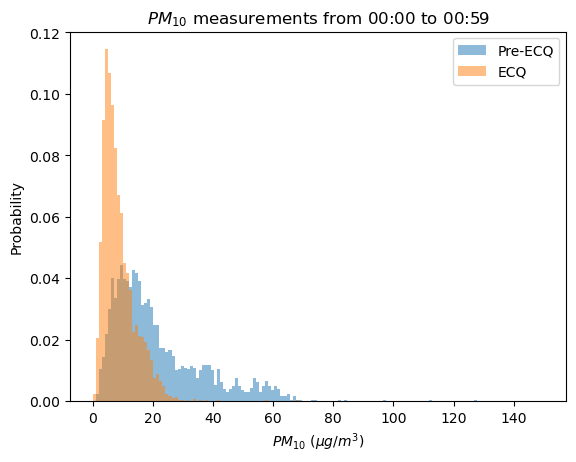

In [26]:
plt.hist(prepandemic_data[['pm10']][(prepandemic_data.index.hour == 0)].iloc[:,0].to_numpy(),
         bins = np.linspace(0,150, 150), density =  True, alpha =0.5, label = 'Pre-ECQ')

plt.title("$PM_{10}$ measurements from 00:00 to 00:59")
plt.xlabel("$PM_{10}~(\mu g/m^3)$")
plt.ylabel('Probability')
# plt.ylim(0, 450)

plt.hist(ecq_data[['pm10']][(ecq_data.index.hour == 0)].iloc[:,0].to_numpy(),
         bins = np.linspace(0,150, 150), density =  True, alpha = 0.5, label = 'ECQ');

plt.legend()
# plt.ylim(0, 450)


(0.0, 450.0)

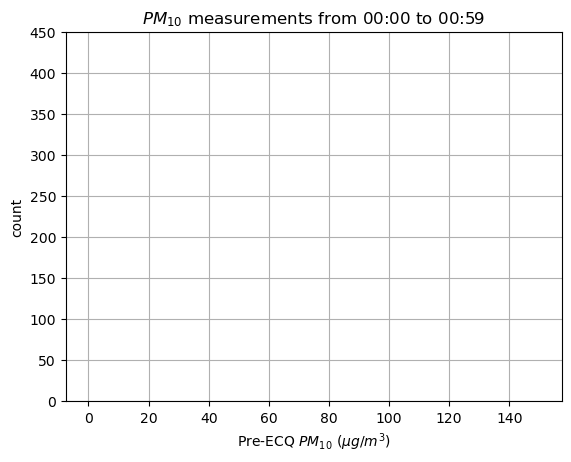

In [8]:
prepandemic_data[['pm10']][(prepandemic_data.index.hour == 0)].hist(bins = np.linspace(0,150, 150), = True)
plt.title("$PM_{10}$ measurements from 00:00 to 00:59")
plt.xlabel("Pre-ECQ $PM_{10}~(\mu g/m^3)$")
plt.ylabel('count')
plt.ylim(0, 450)

In [ ]:
prepandemic_data[['pm10']].groupby(by = prepandemic_data.index.hour).median()

(0.0, 150.0)

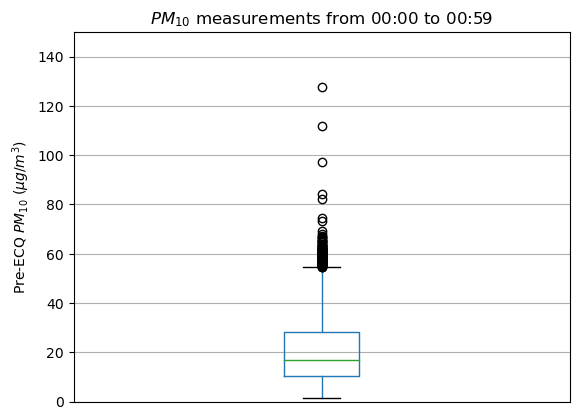

In [184]:
prepandemic_data[['pm10']][(prepandemic_data.index.hour == 0)].boxplot()
plt.title("$PM_{10}$ measurements from 00:00 to 00:59")
plt.ylabel("Pre-ECQ $PM_{10}~(\mu g/m^3)$")
# plt.xlabel([])
plt.xticks([])
# plt.ylabel('count')
plt.ylim(0,150)

(0.0, 1.0)

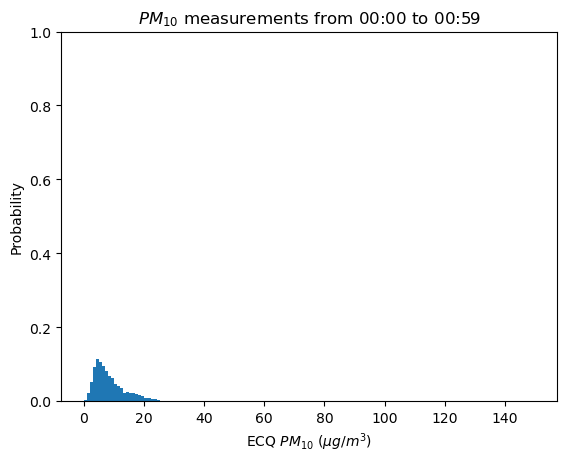

In [19]:
plt.hist(ecq_data[['pm10']][(ecq_data.index.hour == 0)].iloc[:,0].to_numpy(),
         bins = np.linspace(0,150, 150), density =  True)

plt.title("$PM_{10}$ measurements from 00:00 to 00:59")
plt.xlabel("ECQ $PM_{10}~(\mu g/m^3)$")
plt.ylabel('Probability')
# plt.ylim(0, 450)
plt.ylim(0,1)

(0.0, 450.0)

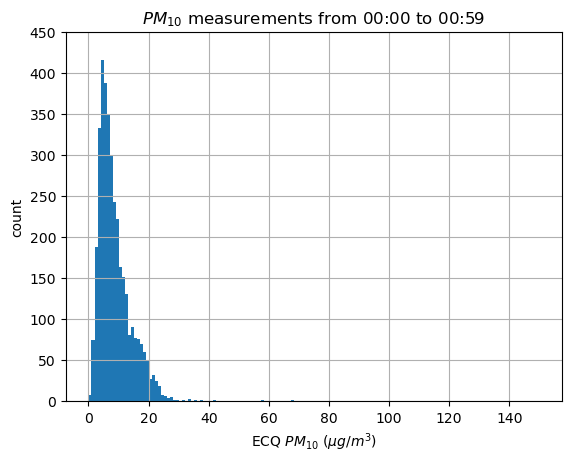

In [179]:
ecq_data[['pm10']][(ecq_data.index.hour == 0)].hist(bins = np.linspace(0,150,150))
plt.title("$PM_{10}$ measurements from 00:00 to 00:59")
plt.xlabel("ECQ $PM_{10}~(\mu g/m^3)$")
plt.ylabel('count')
plt.ylim(0,450)

(0.0, 150.0)

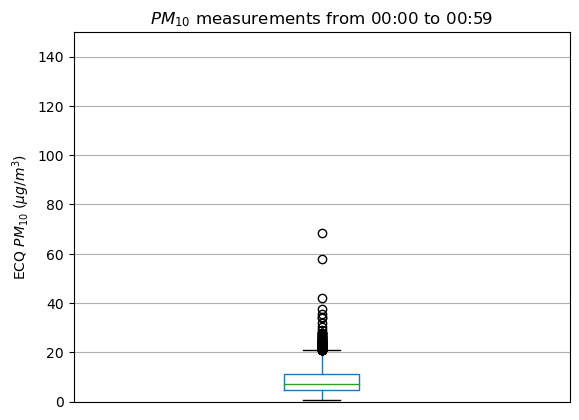

In [185]:
ecq_data[['pm10']][(ecq_data.index.hour == 0)].boxplot()
plt.title("$PM_{10}$ measurements from 00:00 to 00:59")
plt.ylabel("ECQ $PM_{10}~(\mu g/m^3)$")
# plt.xlabel([])
plt.xticks([])
# plt.ylabel('count')
plt.ylim(0,150)

# histograms daily

In [47]:
prepandemic_data[['pm10']][(prepandemic_data.index.dayofweek == 0)].quantile(0.75)

pm10    21.2
Name: 0.75, dtype: float64

In [29]:
prepandemic_data[['pm10']][(prepandemic_data.index.dayofweek == 0)].median()

pm10    13.0
dtype: float64

In [37]:
ecq_data[['pm10']][(ecq_data.index.dayofweek == 0)].median()

pm10    10.0
dtype: float64

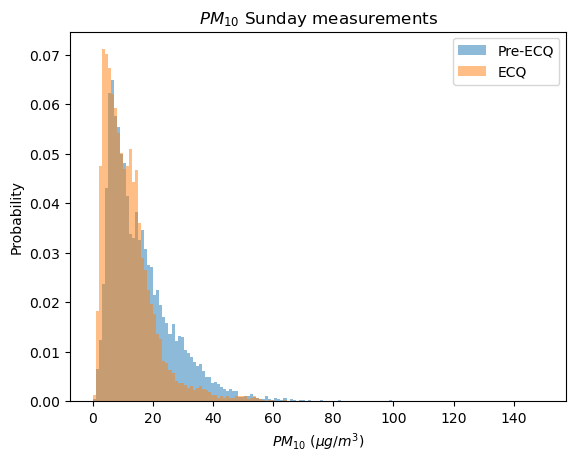

In [27]:
plt.hist(prepandemic_data[['pm10']][(prepandemic_data.index.dayofweek == 0)].iloc[:,0].to_numpy(),
         bins = np.linspace(0,150, 150), density =  True, alpha =0.5, label = 'Pre-ECQ')

plt.title("$PM_{10}$ Sunday measurements")
plt.xlabel("$PM_{10}~(\mu g/m^3)$")
plt.ylabel('Probability')
# plt.ylim(0, 450)

plt.hist(ecq_data[['pm10']][(ecq_data.index.dayofweek == 0)].iloc[:,0].to_numpy(),
         bins = np.linspace(0,150, 150), density =  True, alpha = 0.5, label = 'ECQ');

plt.legend()

# plt.ylim(0, 450)


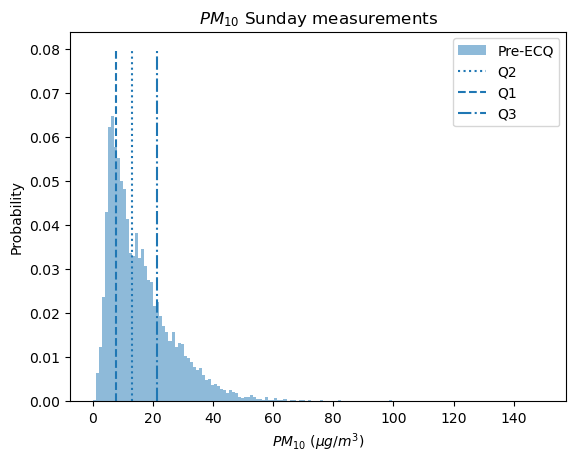

In [48]:
plt.hist(prepandemic_data[['pm10']][(prepandemic_data.index.dayofweek == 0)].iloc[:,0].to_numpy(),
         bins = np.linspace(0,150, 150), density =  True, alpha =0.5, label = 'Pre-ECQ')

plt.title("$PM_{10}$ Sunday measurements")
plt.xlabel("$PM_{10}~(\mu g/m^3)$")
plt.ylabel('Probability')
# plt.ylim(0, 450)

# plt.hist(ecq_data[['pm10']][(ecq_data.index.dayofweek == 0)].iloc[:,0].to_numpy(),
#          bins = np.linspace(0,150, 150), density =  True, alpha = 0.5, label = 'ECQ');
plt.vlines(13, 0, 0.08, linestyle = 'dotted', label = 'Q2')
plt.vlines(7.7, 0, 0.08, linestyle = 'dashed', label = 'Q1')
plt.vlines(21.2, 0, 0.08, linestyle = 'dashdot', label = 'Q3')

plt.legend()

# plt.ylim(0, 450)


(0.0, 900.0)

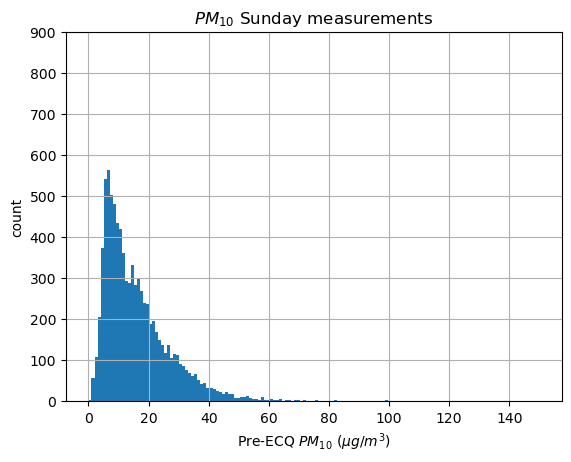

In [173]:
prepandemic_data[['pm10']][(prepandemic_data.index.dayofweek == 0)].hist(bins = np.linspace(0,150, 150))
plt.title("$PM_{10}$ Sunday measurements")
plt.xlabel("Pre-ECQ $PM_{10}~(\mu g/m^3)$")
plt.ylabel('count')
plt.ylim(0,900)

(0.0, 150.0)

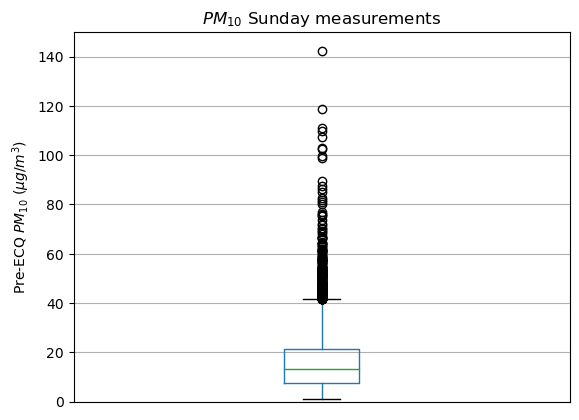

In [189]:
prepandemic_data[['pm10']][(prepandemic_data.index.dayofweek == 0)].boxplot()
plt.title("$PM_{10}$ Sunday measurements")
plt.ylabel("Pre-ECQ $PM_{10}~(\mu g/m^3)$")
# plt.xlabel([])
plt.xticks([])
# plt.ylabel('count')
plt.ylim(0,150)

(0.0, 900.0)

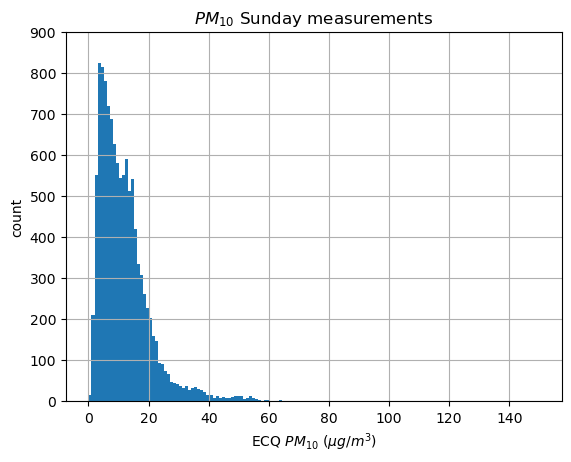

In [172]:
ecq_data[['pm10']][(ecq_data.index.dayofweek == 0)].hist(bins = np.linspace(0,150, 150))
plt.title("$PM_{10}$ Sunday measurements")
plt.xlabel("ECQ $PM_{10}~(\mu g/m^3)$")
plt.ylabel('count')
plt.ylim(0,900)

(0.0, 150.0)

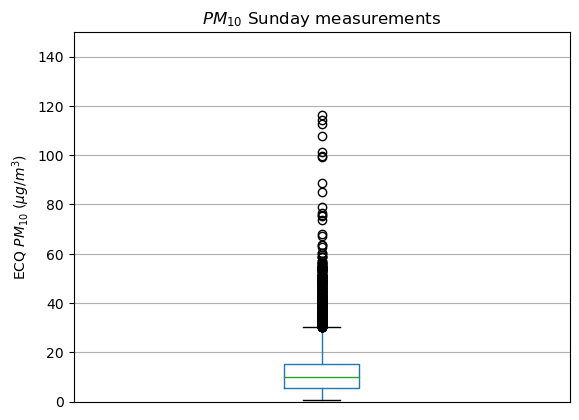

In [190]:
ecq_data[['pm10']][(ecq_data.index.dayofweek == 0)].boxplot()
plt.title("$PM_{10}$ Sunday measurements")
plt.ylabel("ECQ $PM_{10}~(\mu g/m^3)$")
# plt.xlabel([])
plt.xticks([])
# plt.ylabel('count')
plt.ylim(0,150)

# Hourly central tendency and spread comparison

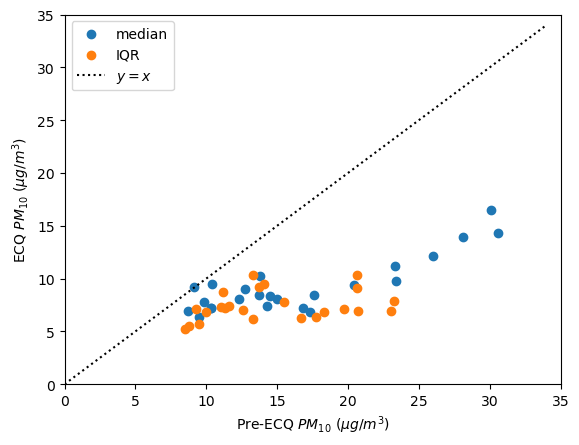

In [91]:
#median comparison
plt.scatter(prepandemic_data[['pm10']].groupby(by = prepandemic_data.index.hour).median().iloc[:,0].to_numpy(),
            ecq_data[['pm10']].groupby(by = ecq_data.index.hour).median().iloc[:,0].to_numpy(), label = 'median')
#IQR
plt.scatter((prepandemic_data[['pm10']].groupby(by = prepandemic_data.index.hour).quantile(0.75) - prepandemic_data[['pm10']].groupby(by = prepandemic_data.index.hour).quantile(0.25)).iloc[:,0].to_numpy(),
           (ecq_data[['pm10']].groupby(by = ecq_data.index.hour).quantile(0.75) - ecq_data[['pm10']].groupby(by = ecq_data.index.hour).quantile(0.25)).iloc[:,0].to_numpy(), label = 'IQR')
plt.plot(np.arange(0,35), np.arange(0,35), color = 'black', label = '$y=x$', linestyle = 'dotted')
plt.xlabel("Pre-ECQ $PM_{10}~(\mu g/m^3)$")
plt.ylabel("ECQ $PM_{10}~(\mu g/m^3)$")
plt.xlim(0,35)
plt.ylim(0,35)
plt.legend()
# plt.title("Pre-ECQ vs ECQ: Comparison of $PM_{10} ~(\mu g/m^3)$")
plt.show()

# Median hourly tabular comparison

In [10]:
prepandemic_data[['pm1']].groupby(by = prepandemic_data.index.hour).describe()

pm1                                                         
     count       mean        std  min     25%    50%     75%    max
0   2280.0  15.408860  11.432575  1.3   7.300  12.00  18.900   53.6
1   2280.0  15.618026  11.678485  1.7   6.800  12.90  19.800   69.7
2   2279.0  17.381351  12.068097  2.7   7.500  14.40  23.500   64.2
3   2276.0  19.755844  12.603246  2.3  10.375  16.85  24.900   73.2
4   2279.0  22.805968  14.204318  1.4  13.200  20.00  28.900  141.2
5   2278.0  24.435558  13.785382  2.7  13.525  22.70  32.700   95.0
6   2279.0  25.238745  13.913761  2.3  14.600  23.20  31.000  113.8
7   2280.0  23.969737  13.003485  4.5  14.900  20.80  29.500   82.1
8   2278.0  16.079807   8.187182  3.1  10.300  14.60  19.975   53.7
9   2276.0  10.323155   6.376857  1.4   6.300   8.80  12.725   57.9
10  2273.0   7.964936   4.604369  1.0   4.500   7.00  10.700   30.0
11  2269.0   7.411679   6.149660  1.0   3.100   5.20   8.900   36.5
12  2274.0   7.399560   7.527558  0.5   2.800   4.60   8.500   46.7
13  2273.0   6.846942   6.110093  0.6   2.700   4.40   9.300   30.9
14  2270.0   6.099604   4.863851  0.5   3.000   4.40   7.200   45.4
15  2275.0   5.579297   5.175699  0.6   2.900   4.30   6.250   49.9
16  2278.0   5.648727   4.447895  0.9   3.200   4.60   6.400   34.8
17  2276.0   6.914455   5.537964  1.3   4.200   5.70   7.900   49.2
18  2277.0   9.101976   4.858273  2.1   5.900   8.10  11.100   38.7
19  2278.0  10.266023   4.512443  1.3   7.200   9.20  12.400   46.6
20  2279.0  10.348486   5.513352  1.8   6.500   9.20  13.100   32.1
21  2280.0  11.024123   6.128542  1.8   6.200   9.80  13.800   43.0
22  2279.0  12.170250   7.704609  1.6   6.500   9.70  15.400   50.8
23  2279.0  14.455419  10.373924  2.1   6.400  11.70  18.200   54.9

In [16]:
(prepandemic_data[['pm1']].groupby(by = prepandemic_data.index.hour).median().iloc[:,0])<(ecq_data[['pm1']].groupby(by = ecq_data.index.hour).median().iloc[:,0])

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12     True
13     True
14     True
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
Name: pm1, dtype: bool

In [14]:
(ecq_data[['pm1']].groupby(by = ecq_data.index.hour).median().iloc[:,0])

0      5.50
1      6.60
2      7.30
3      8.90
4      9.80
5     10.90
6     12.60
7     10.20
8      6.70
9      5.60
10     5.60
11     6.60
12     6.25
13     4.80
14     4.50
15     4.30
16     4.10
17     4.80
18     6.30
19     7.80
20     6.70
21     6.40
22     5.40
23     5.00
Name: pm1, dtype: float64

In [9]:
prepandemic_data[['pm25']].groupby(by = prepandemic_data.index.hour).describe()

pm25                                                        
     count       mean        std  min     25%   50%     75%    max
0   2280.0  17.903377  12.600675  1.5   8.900  14.0  22.900   58.3
1   2280.0  17.989693  12.735386  2.0   8.200  15.1  23.025   73.9
2   2279.0  19.946687  13.182427  2.7   8.600  17.0  27.600   71.1
3   2276.0  22.521617  13.648068  2.5  12.000  19.4  28.900   77.0
4   2279.0  25.663668  15.156902  1.6  15.300  22.9  32.800  145.6
5   2278.0  27.101536  14.768709  3.0  15.400  25.4  36.500   99.4
6   2279.0  28.187582  14.951541  2.5  16.700  26.5  34.700  125.2
7   2280.0  27.615000  14.222484  4.5  17.475  24.7  33.800   85.6
8   2278.0  19.180860   9.361293  3.7  12.600  17.4  23.900   74.9
9   2276.0  12.568937   7.442517  1.5   7.600  10.8  15.700   66.9
10  2273.0   9.963000   5.571418  1.0   5.900   8.7  13.100   50.5
11  2269.0   9.358352   7.281773  1.1   4.300   6.8  11.500   55.2
12  2274.0   9.200923   8.690775  0.7   3.800   5.9  10.600   54.4
13  2273.0   8.728201   7.257653  0.6   3.900   5.9  12.100   63.8
14  2270.0   7.968238   5.981017  0.6   4.200   6.1   9.800   63.9
15  2275.0   7.328923   6.159605  0.6   4.000   5.7   8.200   70.8
16  2278.0   7.385119   5.229437  1.3   4.300   6.2   8.600   53.4
17  2276.0   8.614279   6.128594  1.9   5.500   7.4   9.825   51.1
18  2277.0  10.856039   5.335586  2.4   7.200   9.7  13.300   40.8
19  2278.0  12.085294   5.101421  1.3   8.500  11.1  15.000   47.6
20  2279.0  12.226327   6.272159  1.9   7.800  11.0  15.700   45.9
21  2280.0  12.933904   6.908890  1.9   7.500  11.8  16.400   47.7
22  2279.0  14.279465   8.655522  1.8   8.000  11.6  18.200   56.3
23  2279.0  16.810970  11.354537  2.3   8.000  13.8  21.200   60.7

In [7]:
prepandemic_data[['pm10']].groupby(by = prepandemic_data.index.hour).describe()

pm10                                                       
     count       mean        std  min   25%    50%     75%    max
0   2280.0  21.304474  15.062047  1.5  10.3  16.80  28.050  127.5
1   2280.0  20.993860  14.723023  2.0   9.7  17.60  28.025  155.6
2   2279.0  23.254147  15.050744  2.7  10.1  20.40  33.100  124.6
3   2276.0  25.998243  15.329766  2.5  14.1  23.30  33.800  104.4
4   2279.0  29.013822  16.679491  1.6  17.5  26.00  38.200  153.1
5   2278.0  29.885470  16.162003  3.0  17.0  28.10  40.275  111.3
6   2279.0  31.727073  16.508344  2.5  19.2  30.10  39.800  142.2
7   2280.0  33.145219  16.610420  4.5  20.6  30.60  41.200  123.3
8   2278.0  25.515013  13.347089  3.7  16.3  23.40  31.800  118.7
9   2276.0  18.018673  13.160238  1.5   9.9  15.00  22.500  213.1
10  2273.0  15.035900  11.039969  1.0   7.9  12.30  19.100  115.3
11  2269.0  14.973468  13.546004  1.1   6.2  10.40  19.500  127.1
12  2274.0  14.079200  13.625400  0.8   5.2   9.10  19.300  125.3
13  2273.0  14.165772  12.960295  0.6   5.7   9.80  19.400  119.8
14  2270.0  13.800749  12.591179  0.6   6.0  10.30  17.300  103.7
15  2275.0  12.576791  12.225632  0.6   5.4   8.70  15.400  124.2
16  2278.0  12.059701  10.074959  1.3   5.9   9.45  14.375  107.3
17  2276.0  12.862302   9.800660  1.9   6.8  10.30  15.600   97.4
18  2277.0  14.330259   8.395644  2.4   8.6  12.70  18.100  121.7
19  2278.0  14.974188   7.641634  1.3   9.6  13.80  18.900  114.6
20  2279.0  15.173278   8.531134  1.9   9.0  13.70  20.000   75.1
21  2280.0  15.852895   9.099328  1.9   8.9  14.50  20.500   97.5
22  2279.0  17.639930  11.709017  1.8   9.5  14.30  22.800  136.1
23  2279.0  20.221194  13.469915  2.3   9.8  17.30  26.500  112.3

In [8]:
ecq_data[['pm10']].groupby(by = ecq_data.index.hour).describe()

pm10                                                     
     count       mean        std  min   25%    50%   75%    max
0   3600.0   8.623722   5.378075  0.8   4.7   7.20  11.1   68.4
1   3600.0   9.642639   6.510957  0.9   5.5   8.40  12.3  100.2
2   3600.0  10.811806   8.208480  1.0   6.2   9.35  13.1   77.0
3   3600.0  12.357528   8.182931  1.2   7.5  11.20  14.6   69.8
4   3600.0  13.170778   7.162426  1.2   8.8  12.10  15.7   60.0
5   3598.0  15.015036   7.659314  1.2  10.4  13.90  18.3   55.0
6   3600.0  17.774833   8.653161  1.8  12.4  16.50  21.5   83.3
7   3599.0  15.611503   9.001968  2.4   9.4  14.30  19.7  103.6
8   3598.0  11.499833   7.627161  1.2   6.4   9.80  14.2  101.0
9   3593.0  10.050682   7.438852  1.0   5.5   8.10  12.5  116.1
10  3597.0  10.653517   8.584277  1.1   5.2   8.10  13.9  120.2
11  3597.0  11.811537   9.295726  1.0   5.5   9.50  15.8  120.0
12  3596.0  11.678476   9.632109  0.9   5.5   9.20  15.0  108.3
13  3587.0  11.005046  10.316000  1.0   4.8   7.80  14.0  150.7
14  3586.0   9.713023   9.318287  0.7   4.5   7.20  11.7  117.3
15  3593.0   9.092068   8.829656  0.9   4.2   6.90  11.0  133.3
16  3536.0   8.086708   7.117009  1.0   4.1   6.40   9.3  108.9
17  3537.0   8.655329   6.861211  1.1   4.8   7.20  10.3  108.5
18  3540.0  10.169435   5.586561  1.7   6.6   9.00  12.3   82.2
19  3537.0  11.455301   6.037814  2.2   7.1  10.20  14.2   64.2
20  3540.0  10.024915   6.170703  2.0   5.6   8.40  12.9   76.1
21  3540.0   9.379040   6.089992  1.0   4.8   8.30  12.2   89.7
22  3540.0   8.272458   5.061135  1.1   4.7   7.40  10.9   78.6
23  3540.0   8.282655   5.442467  0.8   4.6   6.80  10.9  107.6

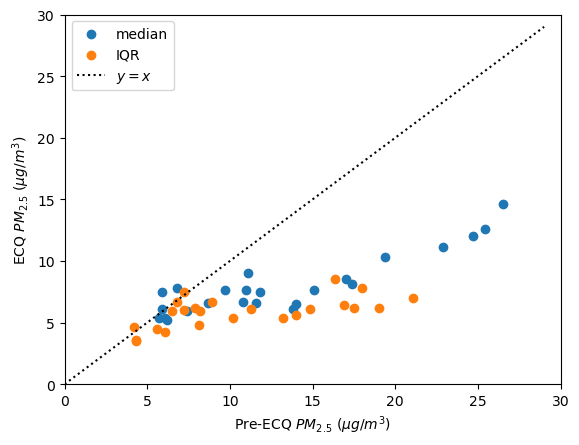

In [94]:
#median comparison
plt.scatter(prepandemic_data[['pm25']].groupby(by = prepandemic_data.index.hour).median().iloc[:,0].to_numpy(),
            ecq_data[['pm25']].groupby(by = ecq_data.index.hour).median().iloc[:,0].to_numpy(), label = 'median')
#IQR
plt.scatter((prepandemic_data[['pm25']].groupby(by = prepandemic_data.index.hour).quantile(0.75) - prepandemic_data[['pm25']].groupby(by = prepandemic_data.index.hour).quantile(0.25)).iloc[:,0].to_numpy(),
           (ecq_data[['pm25']].groupby(by = ecq_data.index.hour).quantile(0.75) - ecq_data[['pm25']].groupby(by = ecq_data.index.hour).quantile(0.25)).iloc[:,0].to_numpy(), label = 'IQR')
plt.plot(np.arange(0,30), np.arange(0,30), color = 'black', label = '$y=x$', linestyle = 'dotted')
plt.xlabel("Pre-ECQ $PM_{2.5}~(\mu g/m^3)$")
plt.ylabel("ECQ $PM_{2.5}~(\mu g/m^3)$")
plt.xlim(0,30)
plt.ylim(0,30)
plt.legend()
# plt.title("Pre-ECQ vs ECQ: Comparison of $PM_{10} ~(\mu g/m^3)$")
plt.show()

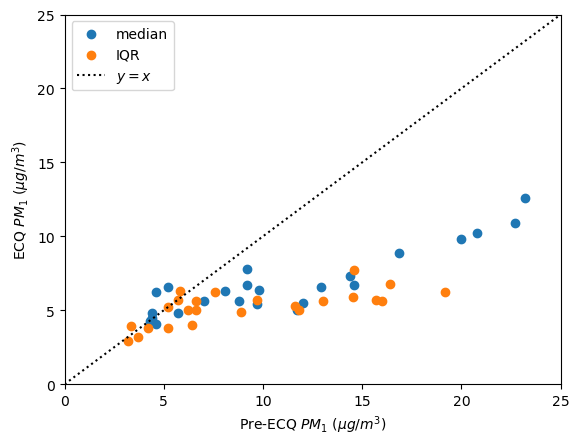

In [96]:
#median comparison
plt.scatter(prepandemic_data[['pm1']].groupby(by = prepandemic_data.index.hour).median().iloc[:,0].to_numpy(),
            ecq_data[['pm1']].groupby(by = ecq_data.index.hour).median().iloc[:,0].to_numpy(), label = 'median')
#IQR
plt.scatter((prepandemic_data[['pm1']].groupby(by = prepandemic_data.index.hour).quantile(0.75) - prepandemic_data[['pm1']].groupby(by = prepandemic_data.index.hour).quantile(0.25)).iloc[:,0].to_numpy(),
           (ecq_data[['pm1']].groupby(by = ecq_data.index.hour).quantile(0.75) - ecq_data[['pm1']].groupby(by = ecq_data.index.hour).quantile(0.25)).iloc[:,0].to_numpy(), label = 'IQR')
plt.plot(np.arange(0,30), np.arange(0,30), color = 'black', label = '$y=x$', linestyle = 'dotted')
plt.xlabel("Pre-ECQ $PM_{1}~(\mu g/m^3)$")
plt.ylabel("ECQ $PM_{1}~(\mu g/m^3)$")
plt.xlim(0,25)
plt.ylim(0,25)
plt.legend()
# plt.title("Pre-ECQ vs ECQ: Comparison of $PM_{10} ~(\mu g/m^3)$")
plt.show()

# Daily central tendency and spread comparison

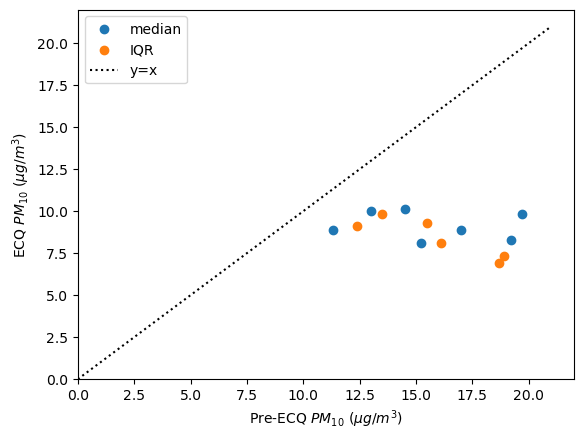

In [5]:
#median
plt.scatter(prepandemic_data[['pm10']].groupby(by = prepandemic_data.index.day_of_week).median(), 
           ecq_data[['pm10']].groupby(by = ecq_data.index.day_of_week).median(), label = 'median')
#iqr
plt.scatter((prepandemic_data[['pm10']].groupby(by = prepandemic_data.index.day_of_week).quantile(0.75) - prepandemic_data[['pm10']].groupby(by = prepandemic_data.index.day_of_week).quantile(0.25)).iloc[:,0].to_numpy(),
           (ecq_data[['pm10']].groupby(by = ecq_data.index.day_of_week).quantile(0.75) - ecq_data[['pm10']].groupby(by = ecq_data.index.day_of_week).quantile(0.25)).iloc[:,0].to_numpy(), label  = 'IQR')           
#y=x
plt.plot(np.arange(0,22), np.arange(0,22), label = 'y=x', linestyle = 'dotted', color = 'black')
plt.xlabel("Pre-ECQ $PM_{10}~(\mu g/m^3)$")
plt.ylabel("ECQ $PM_{10}~(\mu g/m^3)$")
plt.xlim(0,22)
plt.ylim(0,22)
plt.legend()
plt.show()

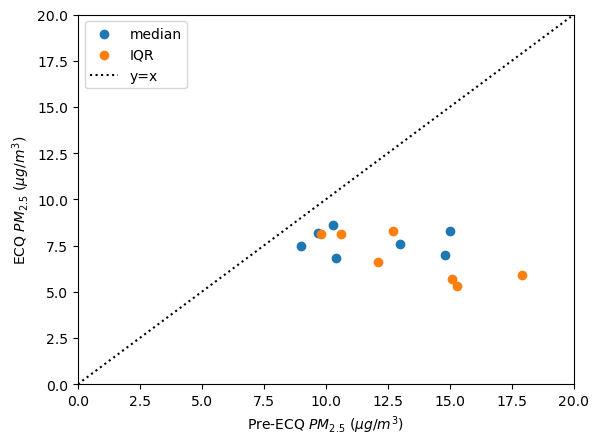

In [7]:
#median
plt.scatter(prepandemic_data[['pm25']].groupby(by = prepandemic_data.index.day_of_week).median(), 
           ecq_data[['pm25']].groupby(by = ecq_data.index.day_of_week).median(), label = 'median')
#iqr
plt.scatter((prepandemic_data[['pm25']].groupby(by = prepandemic_data.index.day_of_week).quantile(0.75) - prepandemic_data[['pm25']].groupby(by = prepandemic_data.index.day_of_week).quantile(0.25)).iloc[:,0].to_numpy(),
           (ecq_data[['pm25']].groupby(by = ecq_data.index.day_of_week).quantile(0.75) - ecq_data[['pm25']].groupby(by = ecq_data.index.day_of_week).quantile(0.25)).iloc[:,0].to_numpy(), label  = 'IQR')           
#y=x
plt.plot(np.arange(0,22), np.arange(0,22), label = 'y=x', linestyle = 'dotted', color = 'black')
plt.xlabel("Pre-ECQ $PM_{2.5}~(\mu g/m^3)$")
plt.ylabel("ECQ $PM_{2.5}~(\mu g/m^3)$")
plt.xlim(0,20)
plt.ylim(0,20)
plt.legend()
plt.show()


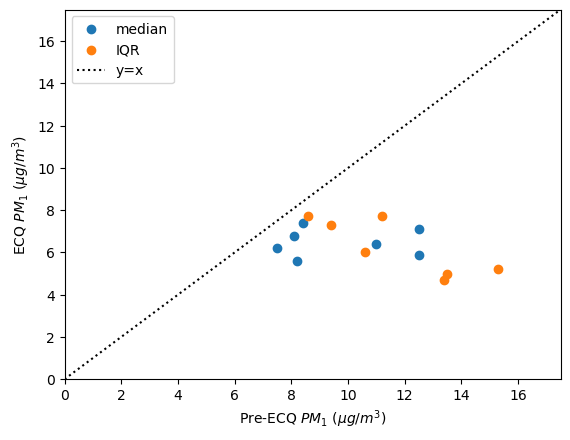

In [8]:
#median
plt.scatter(prepandemic_data[['pm1']].groupby(by = prepandemic_data.index.day_of_week).median(), 
           ecq_data[['pm1']].groupby(by = ecq_data.index.day_of_week).median(), label = 'median')
#iqr
plt.scatter((prepandemic_data[['pm1']].groupby(by = prepandemic_data.index.day_of_week).quantile(0.75) - prepandemic_data[['pm1']].groupby(by = prepandemic_data.index.day_of_week).quantile(0.25)).iloc[:,0].to_numpy(),
           (ecq_data[['pm1']].groupby(by = ecq_data.index.day_of_week).quantile(0.75) - ecq_data[['pm1']].groupby(by = ecq_data.index.day_of_week).quantile(0.25)).iloc[:,0].to_numpy(), label  = 'IQR')           
#y=x
plt.plot(np.arange(0,22), np.arange(0,22), label = 'y=x', linestyle = 'dotted', color = 'black')
plt.xlabel("Pre-ECQ $PM_{1}~(\mu g/m^3)$")
plt.ylabel("ECQ $PM_{1}~(\mu g/m^3)$")
plt.xlim(0,17.5)
plt.ylim(0,17.5)
plt.legend()
plt.show()

# scatter plot of wind speeds and wind directoin

In [286]:
wind_dir_speed_subset = prepandemic_data[(prepandemic_data.windspeed<1) & (prepandemic_data.wind_dir<10)]

In [278]:
scat_color = (wind_dir_speed_subset.pm10>=20.6).apply(lambda x: int(x)).to_numpy()

In [288]:
speed_high_pm10 = wind_dir_speed_subset[(wind_dir_speed_subset.pm10>=20.6)].windspeed.to_numpy()
direction_high_pm10 = wind_dir_speed_subset[(wind_dir_speed_subset.pm10>=20.6)].wind_dir.to_numpy()

speed_else = wind_dir_speed_subset[~(wind_dir_speed_subset.pm10>=20.6)].windspeed.to_numpy()
direction_else = wind_dir_speed_subset[~(wind_dir_speed_subset.pm10>=20.6)].wind_dir.to_numpy()

In [260]:
speed = wind_dir_speed_subset.windspeed.to_numpy()
direction = wind_dir_speed_subset.wind_dir.to_numpy()

In [281]:
scat_color.shape

(20348,)

Text(0, 0.5, 'wind direction (degrees)')

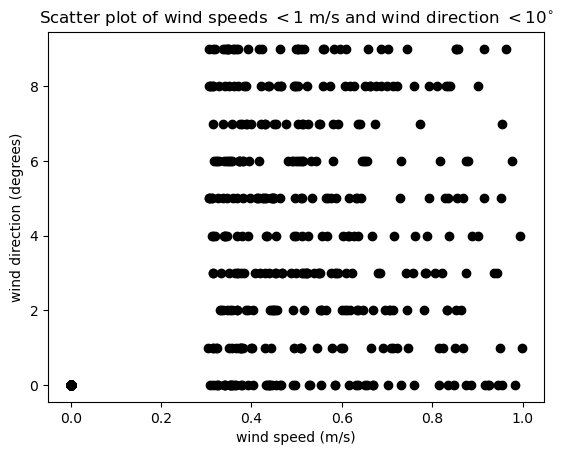

In [292]:
plt.title('Scatter plot of wind speeds $< 1$ m/s and wind direction $< 10 ^{\circ}$')
plt.scatter(speed_else, direction_else, color = 'black')
plt.scatter(speed_high_pm10, direction_high_pm10, color = 'black')
plt.xlabel('wind speed (m/s)')
plt.ylabel('wind direction (degrees)')

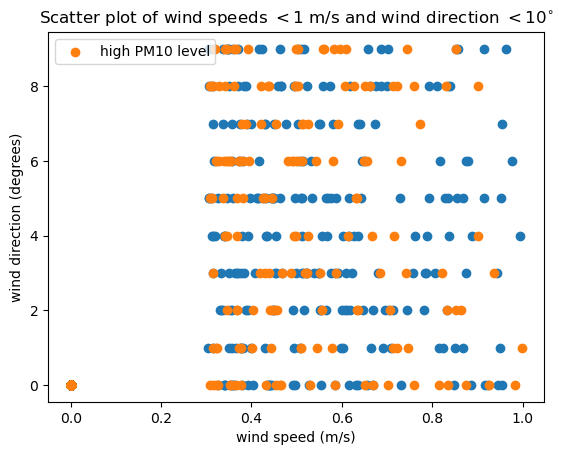

In [295]:
plt.title('Scatter plot of wind speeds $< 1$ m/s and wind direction $< 10 ^{\circ}$')
plt.scatter(speed_else, direction_else)
plt.scatter(speed_high_pm10, direction_high_pm10,label = 'high PM10 level')
plt.xlabel('wind speed (m/s)')
plt.ylabel('wind direction (degrees)')
plt.legend(loc = 'upper left')
plt.show()

Text(0, 0.5, 'wind direction (degrees)')

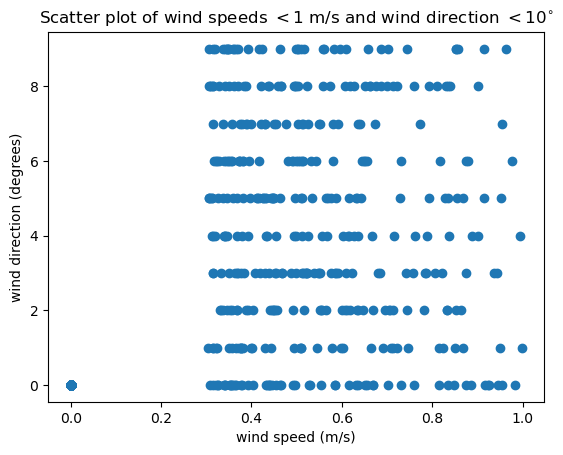

In [285]:
plt.title('Scatter plot of wind speeds $< 1$ m/s and wind direction $< 10 ^{\circ}$')
plt.scatter(speed, direction)
plt.xlabel('wind speed (m/s)')
plt.ylabel('wind direction (degrees)')